In [3]:
import xarray as xr

In [4]:
data = xr.open_dataset("simulation_output.nc")

In [5]:
data

<xarray.Dataset> Size: 14MB
Dimensions:          (subpop: 581, date: 122, infection_stage: 3, age: 4)
Coordinates:
  * subpop           (subpop) object 5kB '11001' '11002' ... '93088' '93090'
  * date             (date) datetime64[ns] 976B 2024-01-01 ... 2024-05-01
  * age              (age) object 32B 'age0to5' 'age5to15' ... 'age65to120'
  * infection_stage  (infection_stage) object 24B 'S' 'I' 'R'
Data variables:
    prevalence       (date, infection_stage, age, subpop) float64 7MB ...
    incidence        (date, infection_stage, age, subpop) float64 7MB ...
Attributes:
    description:  Dynamical simulation results
    run_id:       20240719_004312

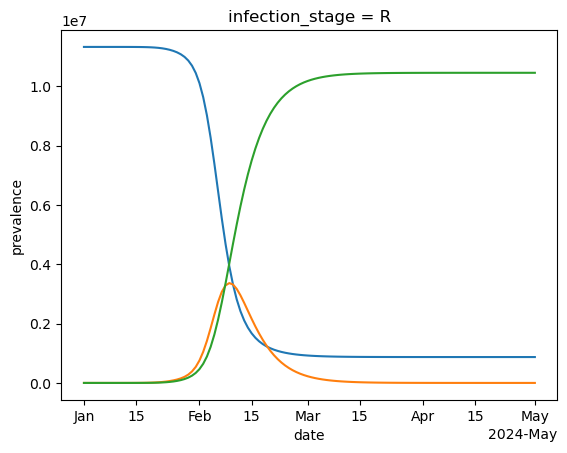

In [8]:
data.sel({'infection_stage': 'S'}).sum(dim=['subpop', 'age'])['prevalence'].plot()
data.sel({'infection_stage': 'I'}).sum(dim=['subpop', 'age'])['prevalence'].plot()
data.sel({'infection_stage': 'R'}).sum(dim=['subpop', 'age'])['prevalence'].plot()

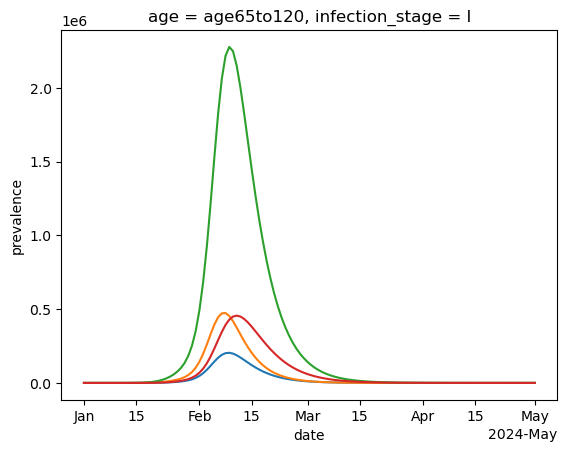

In [10]:
data.sel({'infection_stage': 'I', 'age': 'age0to5'}).sum(dim=['subpop'])['prevalence'].plot()
data.sel({'infection_stage': 'I', 'age': 'age5to15'}).sum(dim=['subpop'])['prevalence'].plot()
data.sel({'infection_stage': 'I', 'age': 'age15to65'}).sum(dim=['subpop'])['prevalence'].plot()
data.sel({'infection_stage': 'I', 'age': 'age65to120'}).sum(dim=['subpop'])['prevalence'].plot()